In [9]:
# HYPER PARAMETERS

PAST_DATA_START = "1978"
PAST_DATA_END = "1983"

CURRENT_DATA_START = "2016"
CURRENT_DATA_END = "2021"

In [88]:
import arch
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from arch.unitroot import PhillipsPerron
import pandas as pd
import numpy as np
import statsmodels.api as sm


data = pd.read_csv("dataset.csv", index_col = 0, parse_dates = True)
data.columns = ['Inflation', 'Unemployment', 'Inflation_Expectations']

past_data = data[PAST_DATA_START: PAST_DATA_END]
current_data = data[CURRENT_DATA_START: CURRENT_DATA_END]


In [89]:
data

,Inflation,Unemployment,Inflation_Expectations
DATE,,,
1978-01-01,6.81431,6.4,5.2
1978-02-01,6.23946,6.3,6.4
1978-03-01,6.37584,6.3,6.3
1978-04-01,6.50000,6.1,6.7
1978-05-01,7.14286,6.0,6.9
...,...,...,...
2021-08-01,5.20248,5.2,4.6
2021-09-01,5.37730,4.7,4.6
2021-10-01,6.24352,4.6,4.8


In [90]:
def pp_test(series: pd.Series) -> None:

    pp = PhillipsPerron(series)
    print(f" \n {series.name}")
    print(pp.summary().as_text())

In [91]:
data.apply(pp_test)

 
 Inflation
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.308
P-value                         0.169
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Unemployment
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.266
P-value                         0.016
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Inflation_Expectations
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.697
P-value                         0.075
Lags                               19
-------------------------------------

Trend: Constant


Inflation                 None
Unemployment              None
Inflation_Expectations    None
dtype: object

In [92]:
past_data.apply(pp_test)

 
 Inflation
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.776
P-value                         0.826
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Unemployment
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.127
P-value                         0.704
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Inflation_Expectations
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.153
P-value                         0.693
Lags                               12
-------------------------------------

Trend: Constant


Inflation                 None
Unemployment              None
Inflation_Expectations    None
dtype: object

In [93]:
current_data.apply(pp_test)

 
 Inflation
     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.440
P-value                         0.983
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Unemployment
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.653
P-value                         0.083
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Inflation_Expectations
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.369
P-value                         0.915
Lags                               12
-------------------------------------

Trend: Constant


Inflation                 None
Unemployment              None
Inflation_Expectations    None
dtype: object

In [94]:
data.diff().dropna().apply(pp_test)

 
 Inflation
     Phillips-Perron Test (Z-tau)    
Test Statistic                -13.505
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Unemployment
     Phillips-Perron Test (Z-tau)    
Test Statistic                -22.543
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 Inflation_Expectations
     Phillips-Perron Test (Z-tau)    
Test Statistic                -30.414
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant


Inflation                 None
Unemployment              None
Inflation_Expectations    None
dtype: object

In [148]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def acf_pacf(series):

    fig, ax = plt.subplots(ncols = 2, figsize = (12, 4))
    fig.suptitle(f"Serial Correlation Plots for {series.name}")
    plot_acf(series, ax = ax[0])
    ax[0].set_title("Autocorrelation Plot")
    plot_pacf(series, ax = ax[1])
    ax[1].set_title("Partial Autocorrelation Plot")

    plt.show()


    

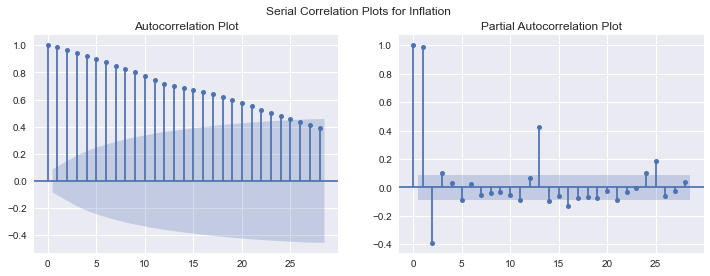

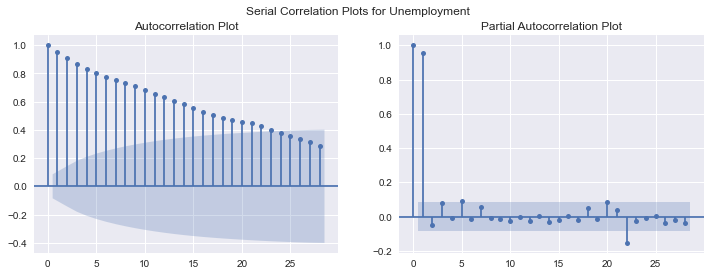

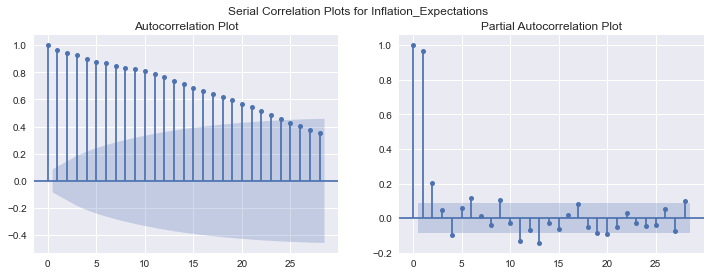

Inflation                 None
Unemployment              None
Inflation_Expectations    None
dtype: object

In [149]:
data.apply(acf_pacf)

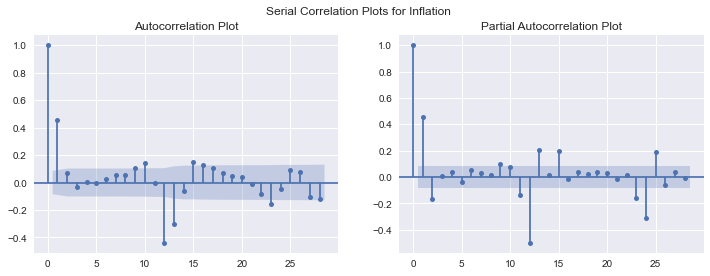

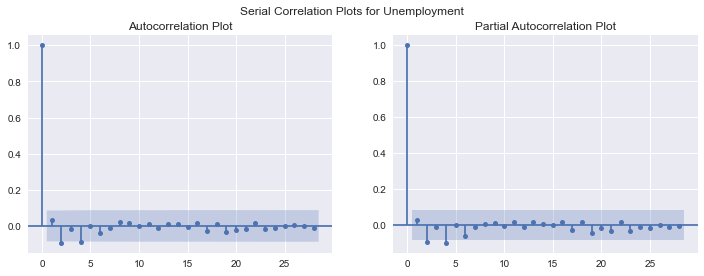

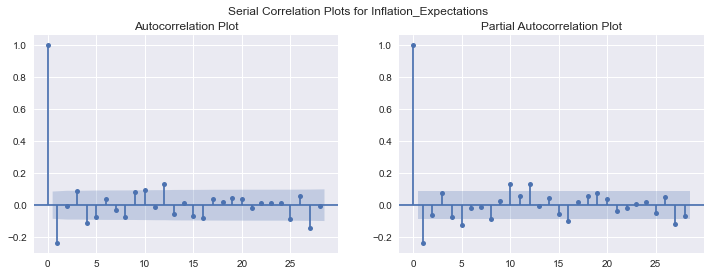

Inflation                 None
Unemployment              None
Inflation_Expectations    None
dtype: object

In [150]:
data.diff().dropna().apply(acf_pacf)

In [103]:
def plot_philips(data):

  dates = [x.timestamp() for x in data.index]
  plt.figure(figsize=(10, 8))
  plt.grid(True)
  plt.scatter(data['Unemployment'].values, data['Inflation'].values,
              c=dates, cmap='coolwarm', s=110, alpha=0.5)
  _ = plt.ylabel('Inflation Rate')
  _ = plt.xlabel('Unemployment Rate')
  plt.title('Scatterplot of Inflation against Unemployment')
  cbar = plt.colorbar()
  cbar.set_label('Date')
  plt.show()


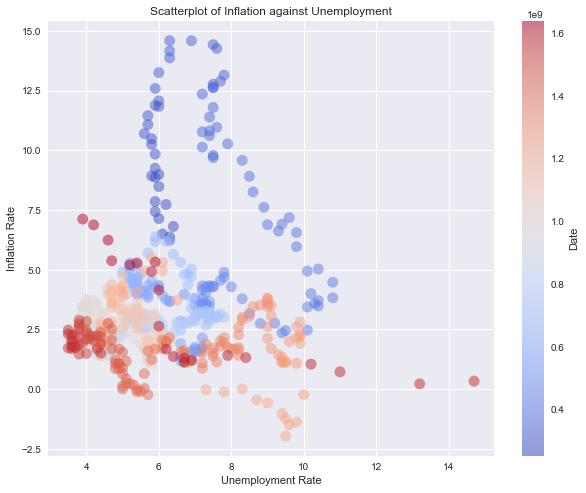

In [104]:
plot_philips(data)

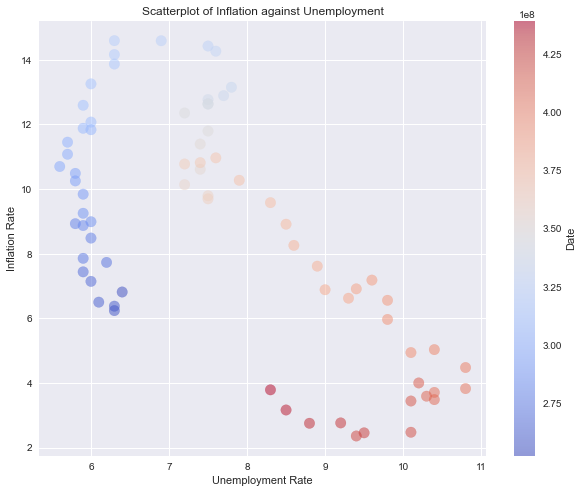

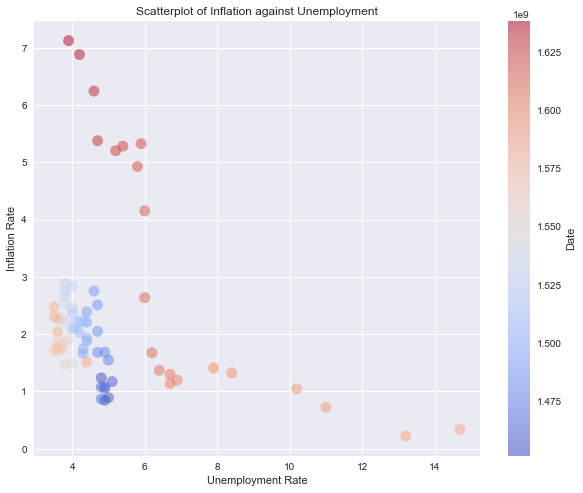

In [105]:
plot_philips(past_data)
plot_philips(current_data)

In [106]:
from statsmodels.tsa.stattools import coint as cointtest

In [107]:
cointtest(data.iloc[:, 0], data.iloc[:, 1])

(-3.047569519593225,
 0.09932647135765599,
 array([-3.91734231, -3.34774868, -3.05250761]))

In [108]:
cointtest(past_data.iloc[:, 0], past_data.iloc[:, 1])

(-1.88007636853562,
 0.5900766761798694,
 array([-4.05734298, -3.42354125, -3.10472479]))

In [109]:
cointtest(current_data.iloc[:, 0], current_data.iloc[:, 1])

(-0.08113883505311789,
 0.9838269645508344,
 array([-4.05734298, -3.42354125, -3.10472479]))

<AxesSubplot:ylabel='Frequency'>

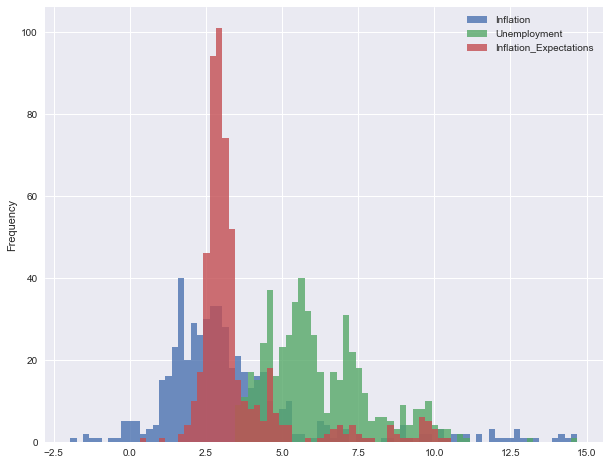

In [110]:
data.plot(kind='hist', figsize = (10, 8), alpha=0.8, bins=80)

In [112]:
import seaborn as sns

past_data['Time Period'] = 'Past'
current_data['Time Period'] = 'Present'
grouped_data = pd.concat([past_data, current_data], axis=0)
grouped_data['Time Period'] = grouped_data['Time Period'].astype('category')

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


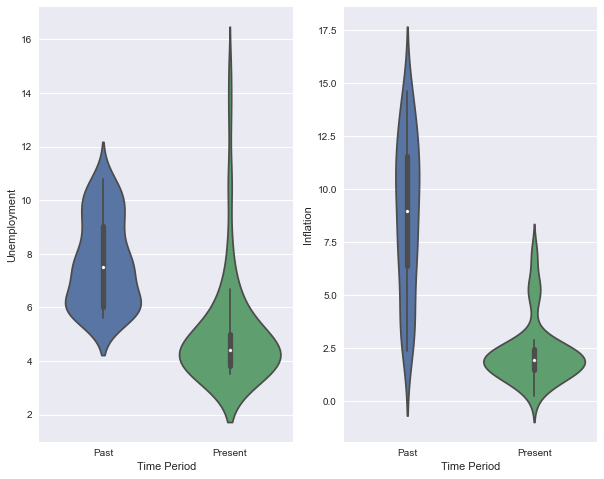

In [120]:
fig, ax = plt.subplots(ncols = 2, figsize = (10, 8))

sns.violinplot(data = grouped_data, y='Unemployment', x = 'Time Period', ax=ax[0])
sns.violinplot(data = grouped_data, y='Inflation', x = 'Time Period', ax=ax[1])
plt.show()

<AxesSubplot:xlabel='DATE'>

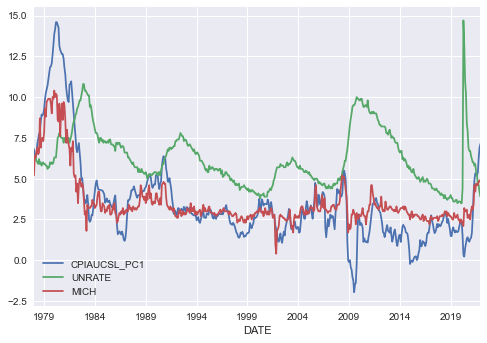

In [121]:
def regresssion(timeseries: pd.DataFrame, endog_col: str = ''):

    endog = timeseries[[endog_col]]
    exog = timeseries[timeseries.columns.difference([endog_col])]

    exog = sm.add_constant(exog)

    result = sm.OLS(endog=endog, exog=exog).fit()
    print(result.summary())

    return result

In [151]:
all_result = regresssion(data[['Inflation', 'Unemployment']].diff().dropna(), endog_col='Inflation')

                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     19.76
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.07e-05
Time:                        18:58:44   Log-Likelihood:                -256.66
No. Observations:                 527   AIC:                             517.3
Df Residuals:                     525   BIC:                             525.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0001      0.017     -0.008   

C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [152]:
past_result = regresssion(past_data[['Inflation', 'Unemployment']].diff().dropna(), endog_col='Inflation')

                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     5.315
Date:                Sun, 06 Feb 2022   Prob (F-statistic):             0.0242
Time:                        18:58:53   Log-Likelihood:                -44.677
No. Observations:                  71   AIC:                             93.35
Df Residuals:                      69   BIC:                             97.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0282      0.055     -0.512   

C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [153]:
current_result = regresssion(current_data[['Inflation', 'Unemployment']].diff().dropna(), endog_col='Inflation')

                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     15.52
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           0.000193
Time:                        18:59:00   Log-Likelihood:                -24.385
No. Observations:                  71   AIC:                             52.77
Df Residuals:                      69   BIC:                             57.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0813      0.041      1.980   

C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [164]:
# Test white noise of residuals and normality
# Test for serial correlation
# Test for difference in the two estimates of Betas

from statsmodels.stats.diagnostic import linear_reset as RESET 

RESET(all_result, power=3, test_type='exog', use_f=False, cov_type='nonrobust', cov_kwargs=None)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[8.52883614]], p-value=0.014060046717060822, df_denom=2>

In [165]:
RESET(past_result, power=3, test_type='exog', use_f=False, cov_type='nonrobust', cov_kwargs=None)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[2.38353684]], p-value=0.3036837488351296, df_denom=2>

In [166]:
RESET(current_result, power=3, test_type='exog', use_f=False, cov_type='nonrobust', cov_kwargs=None)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[1.28128964]], p-value=0.5269525236817822, df_denom=2>

In [179]:
from scipy.stats import kstest, ks_2samp
# Null is same dist
# Alternate is different dist
for result in [all_result, past_result, current_result]:
    print("\n--------------------")
    print(kstest(result.resid, 'norm'))


--------------------
KstestResult(statistic=0.24203707979865696, pvalue=1.162071958519982e-27)

--------------------
KstestResult(statistic=0.2116056808809056, pvalue=0.0028729241955663953)

--------------------
KstestResult(statistic=0.2967576698861613, pvalue=4.8774580801941e-06)


In [182]:
for indicator in data.columns:
    print(f"\n {indicator}--------------------")
    print(ks_2samp(past_data[indicator], current_data[indicator]))


 Inflation--------------------
KstestResult(statistic=0.8055555555555556, pvalue=1.3302101247891915e-23)

 Unemployment--------------------
KstestResult(statistic=0.7916666666666666, pvalue=1.1528487748172994e-22)

 Inflation_Expectations--------------------
KstestResult(statistic=0.8055555555555556, pvalue=1.3302101247891915e-23)


C:\Users\Public\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


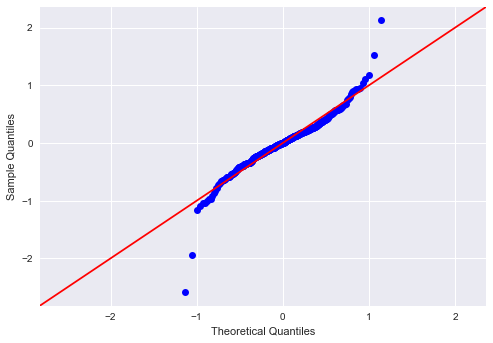

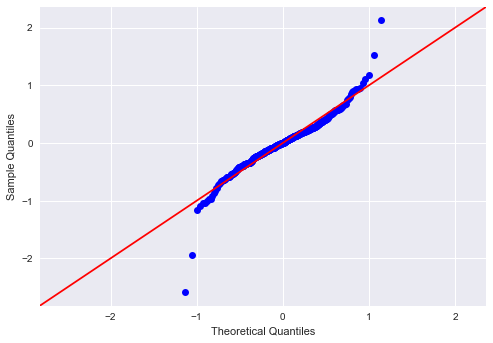

In [178]:
from statsmodels.graphics.gofplots import qqplot

qqplot(all_result.resid, loc=all_result.resid.mean(), scale=all_result.resid.std(), line='45')

In [184]:
from statsmodels.stats.diagnostic import het_white
# Null is homo
# Alternate is Hetero
for result in [all_result, past_result, current_result]:
    print("\n--------------------")
    print(het_white(result.resid, result.model.exog))



--------------------
(3.6835034028124225, 0.15853946891835238, 1.84415721234124, 0.15918357056159915)

--------------------
(0.7507716369170649, 0.6870241610478114, 0.36336677640426046, 0.6966732287562192)

--------------------
(0.8927538687317218, 0.6399425102702774, 0.4329599750651264, 0.65036178739541)


In [174]:
all_result.resid.std()

0.3941703437480316